<a href="https://colab.research.google.com/github/B10956048/113_Finance/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ARIMA

[*********************100%***********************]  1 of 1 completed


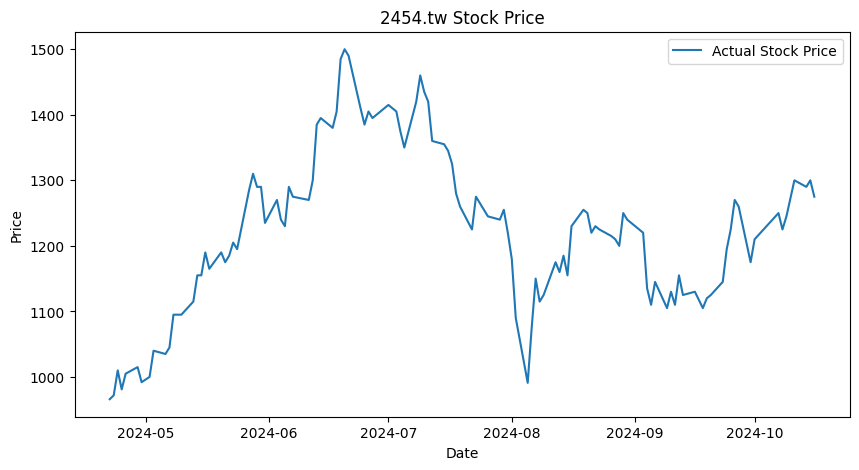

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 下載股價資料 (2454聯發科)
stock_id = "2454.tw"
end = pd.to_datetime('today')
start = end - pd.DateOffset(days=180)  # 過去半年數據

data = yf.download(stock_id, start=start, end=end)


df = data.copy()
# 2. 畫出股價趨勢
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual Stock Price')
plt.title(f'{stock_id} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,984.0,989.0,966.0,966.0,945.095032,9091869
2024-04-23,989.0,989.0,970.0,972.0,950.965149,5846136
2024-04-24,995.0,1020.0,994.0,1010.0,988.142822,6229216
2024-04-25,996.0,1005.0,976.0,981.0,959.770386,6053259
2024-04-26,991.0,1005.0,987.0,1005.0,983.251038,5747819
...,...,...,...,...,...,...
2024-10-09,1260.0,1275.0,1240.0,1245.0,1245.000000,5544071
2024-10-11,1265.0,1310.0,1265.0,1300.0,1300.000000,9881759
2024-10-14,1310.0,1310.0,1285.0,1290.0,1290.000000,3998990


In [ ]:
# 選擇收盤價作為預測目標
close = df['Close']

# 拆分資料分為訓練集(70%) 和測試集(30%)
train_size = int(len(close) * 0.7)
train, test = close[:train_size], close[train_size:]

print(f"訓練集長度: {len(train)}")
print(f"測試集長度: {len(test)}")

訓練集長度: 84
測試集長度: 36


In [ ]:
def optimize_arima(train, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  best_model = None
# 使用迴圈迭代 p, d, q 組合找出最佳參數
  for p in p_values:
    for d in d_values:
      for q in q_values:
        try:
          model = ARIMA(train, order=(p, d, q))
          model_fit = model.fit()
          yhat = model_fit.forecast(steps=len(test))
          error = mean_squared_error(test, yhat)
          if error < best_score:
            best_score, best_cfg = error, (p, d, q)
            best_model = model_fit
        except:
          continue
  return best_cfg, best_model

In [ ]:
# 定義 p, d, q 參數範圍
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)
# 找出 ARIMA 模型最佳參數
best_cfg, best_model = optimize_arima(train, p_values,d_values, q_values)
# 印出最佳参数
print(f'最佳參數 {best_cfg}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

最佳參數 (4, 0, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from math import sqrt
# 預測
yhat = best_model.forecast(steps=len(test))

# 計算誤差RMSE
rmse_optimized = sqrt(mean_squared_error(test, yhat))

# 印出誤差RMSE
print(f"RMSE: {rmse_optimized}")

RMSE: 56.48369732192632


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


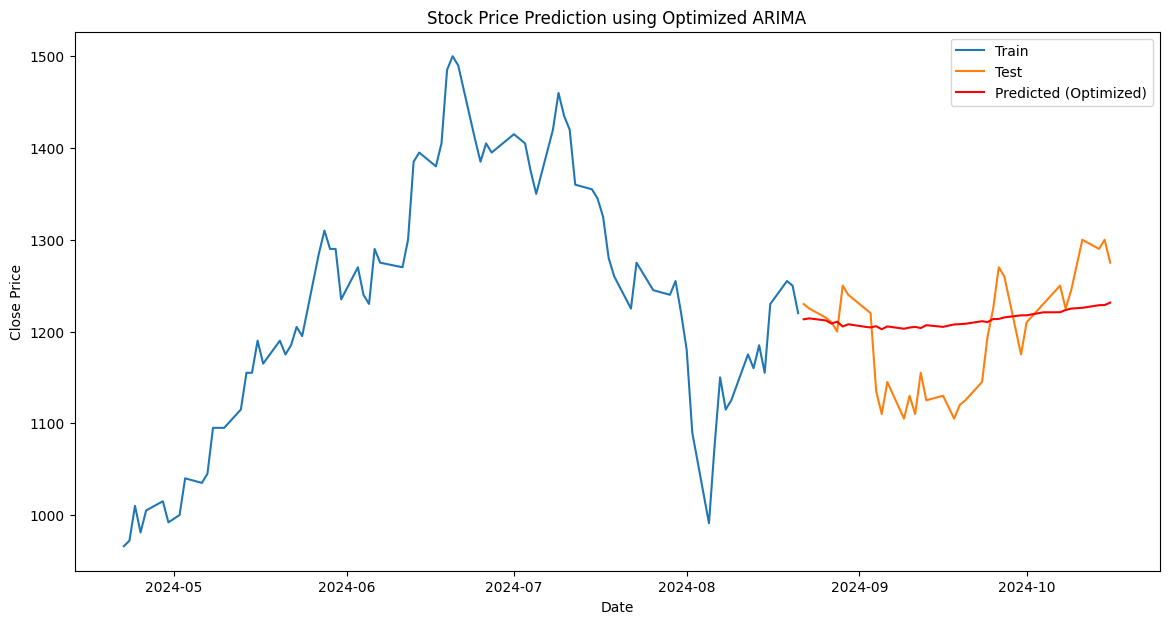

In [ ]:
# 繪製折線圖
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, yhat, color='red', label='Predicted (Optimized)')
plt.title('Stock Price Prediction using Optimized ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### 量化交易(均值回歸策略)

In [55]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 載入股票數據（2454聯發科）1year
stock_id = "2454.tw"
start = "2023-10-22"
end = pd.to_datetime('today')
df = yf.download(stock_id, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [56]:
window_size = 20
#20天的moving_average
df['moving_avg'] = df['Close'].rolling(window=window_size).mean()

In [57]:
#價格與移動平均的差異
df['difference'] = df['Close'] - df['moving_avg']

In [58]:
#移動平均線的標準差
df['std_dev'] = df['Close'].rolling(window=window_size).std()
# 當價格低於移動平均線的標準差，生成「買入」信號
df['Buy_Signal'] = df['difference'] < -df['std_dev']
# 當價格高於移動平均線的標準差，生成「賣出」信號
df['Sell_Signal'] = df['difference'] > -df['std_dev']
df

,Open,High,Low,Close,Adj Close,Volume,moving_avg,difference,std_dev,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,
2023-10-23,825.0,829.0,816.0,821.0,782.498901,5304563,NaN,NaN,NaN,False,False
2023-10-24,821.0,823.0,804.0,816.0,777.733337,5036466,NaN,NaN,NaN,False,False
2023-10-25,818.0,832.0,816.0,822.0,783.452026,6474280,NaN,NaN,NaN,False,False
2023-10-26,815.0,817.0,811.0,817.0,778.686462,5446904,NaN,NaN,NaN,False,False
2023-10-27,824.0,824.0,800.0,801.0,763.436829,6956960,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,1310.0,1310.0,1290.0,1300.0,1300.000000,5915032,1204.00,96.00,65.022263,False,True
2024-10-16,1260.0,1295.0,1260.0,1275.0,1275.000000,6461649,1210.00,65.00,65.794737,False,True
2024-10-17,1295.0,1295.0,1265.0,1275.0,1275.000000,4139436,1217.50,57.50,64.123647,False,True


In [59]:
#初始資金100000
#positions用於紀錄持倉狀況
#portfolio記錄投資組合價值。
init_capital = 100000
positions = pd.DataFrame(index=df.index).fillna(0)
portfolio = pd.DataFrame(index=df.index).fillna(0)

In [60]:
#買入信號出現時，買入100股
#賣入信號出現時，賣入100股
positions['stock'] = 100*df['Buy_Signal']
positions['stock'] = -100*df['Sell_Signal']

In [61]:
#持倉價值 = positions*股票價格
portfolio['positions'] = (positions.multiply(df['Close'], axis=0))
#現金餘額 = 初始資金减去買入和賣出得總成本
portfolio['cash'] = init_capital - (positions.diff().multiply(df['Close'], axis=0)).cumsum()
#投資組合的總價值 = 持倉價值加上現金餘額。
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [62]:
#最終資產 100000 --> 31900 虧 68100
print(portfolio['total'][-1])

31900.0


<ipython-input-62-739c1ccbb54f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(portfolio['total'][-1])


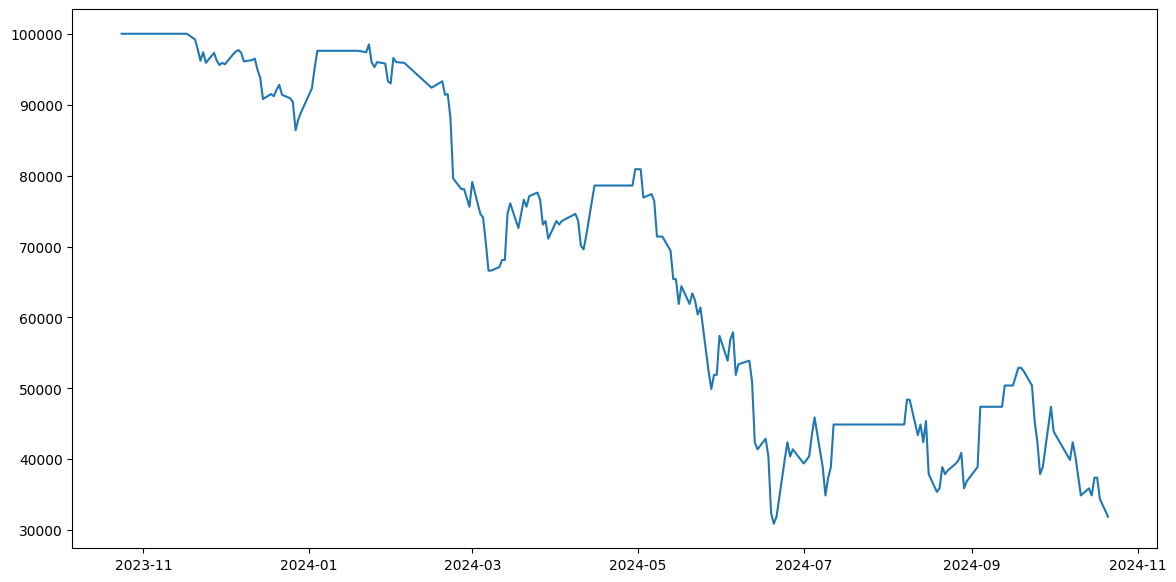

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio['total'], label='Portfolio Value')
plt.show()

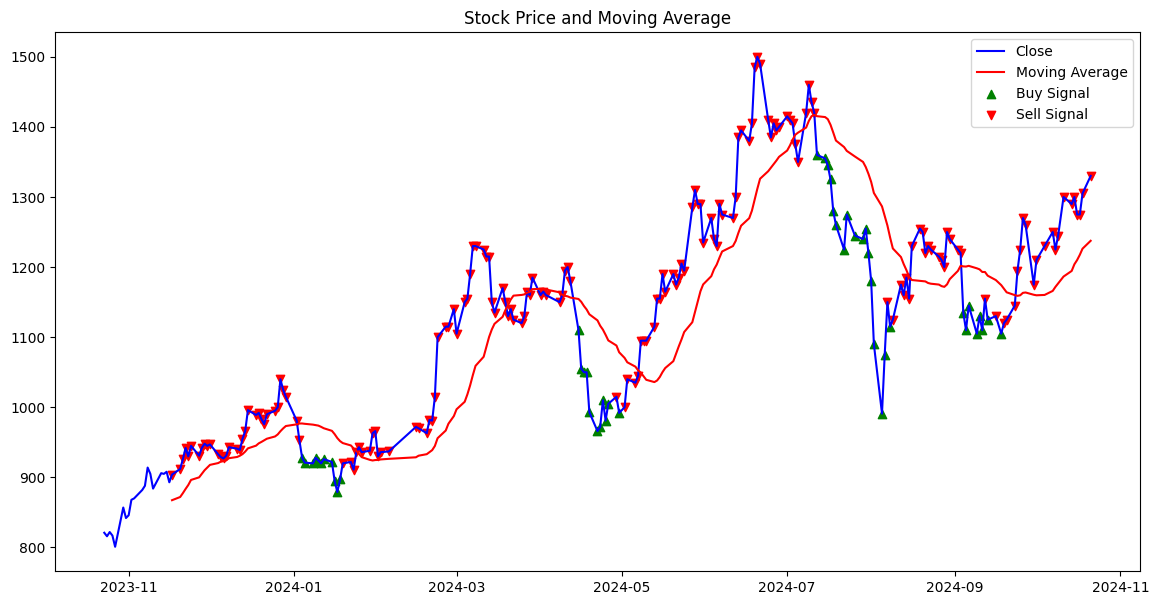

In [65]:
# 繪製價格和移動平均線的圖
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close', color='blue')  # 绘制价格线
plt.plot(df['moving_avg'], label='Moving Average', color='red')  # 绘制移动平均线

# 標記買入和賣出信號
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], label='Buy Signal', marker='^', color='green')
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], label='Sell Signal', marker='v', color='red')

plt.title('Stock Price and Moving Average')
plt.legend()

plt.show()